/var/folders/4h/vzvj91h930v6vjrf1_4jwcnh0000gn/T/ipykernel_7744/2848621756.py:20: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  csv.loc[:, '人民币金额'] = csv['人民币金额'].astype('float')
/var/folders/4h/vzvj91h930v6vjrf1_4jwcnh0000gn/T/ipykernel_7744/2848621756.py:20: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  csv.loc[:, '人民币金额'] = csv['人民币金额'].astype('float')
/var/folders/4h/vzvj91h930v6vjrf1_4jwcnh0000gn/T/ipykernel_7744/2848621756.py:20: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of alwa

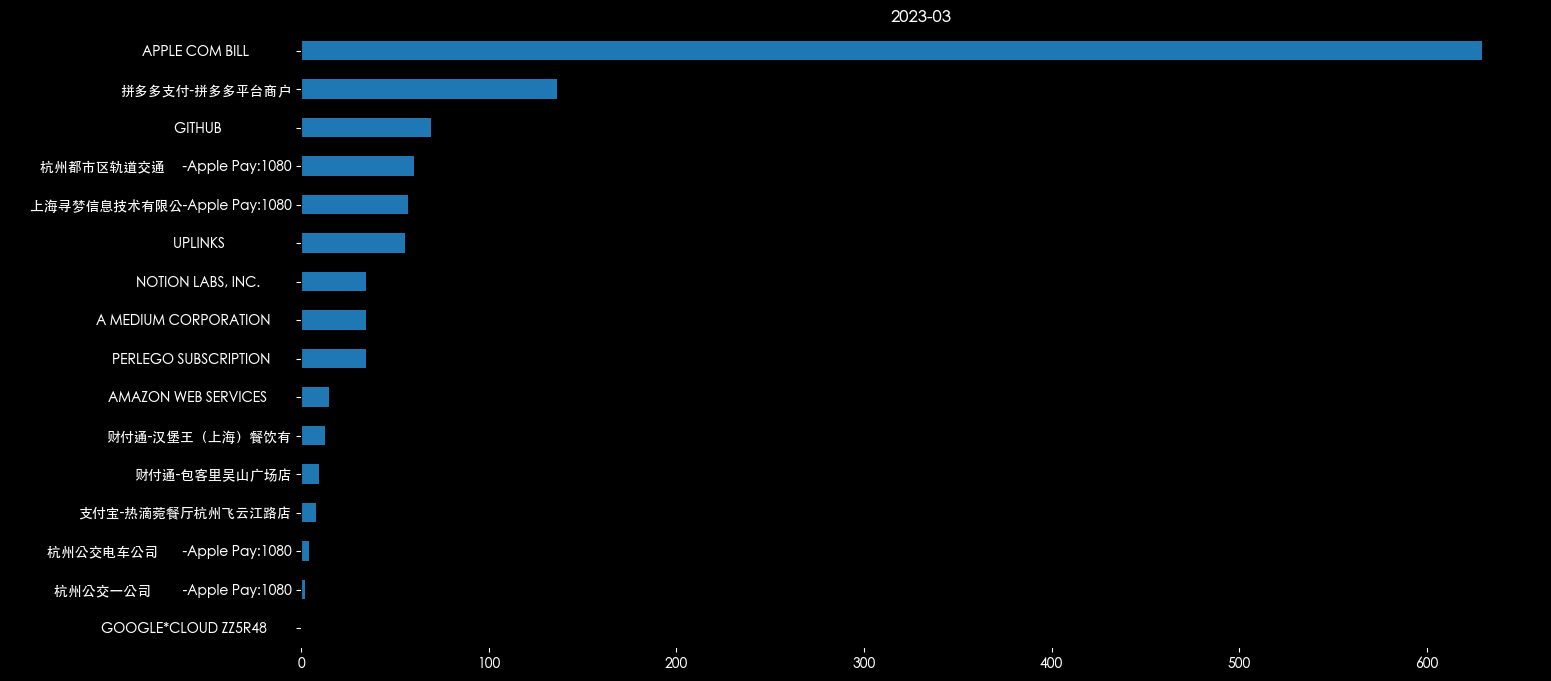

1163.05


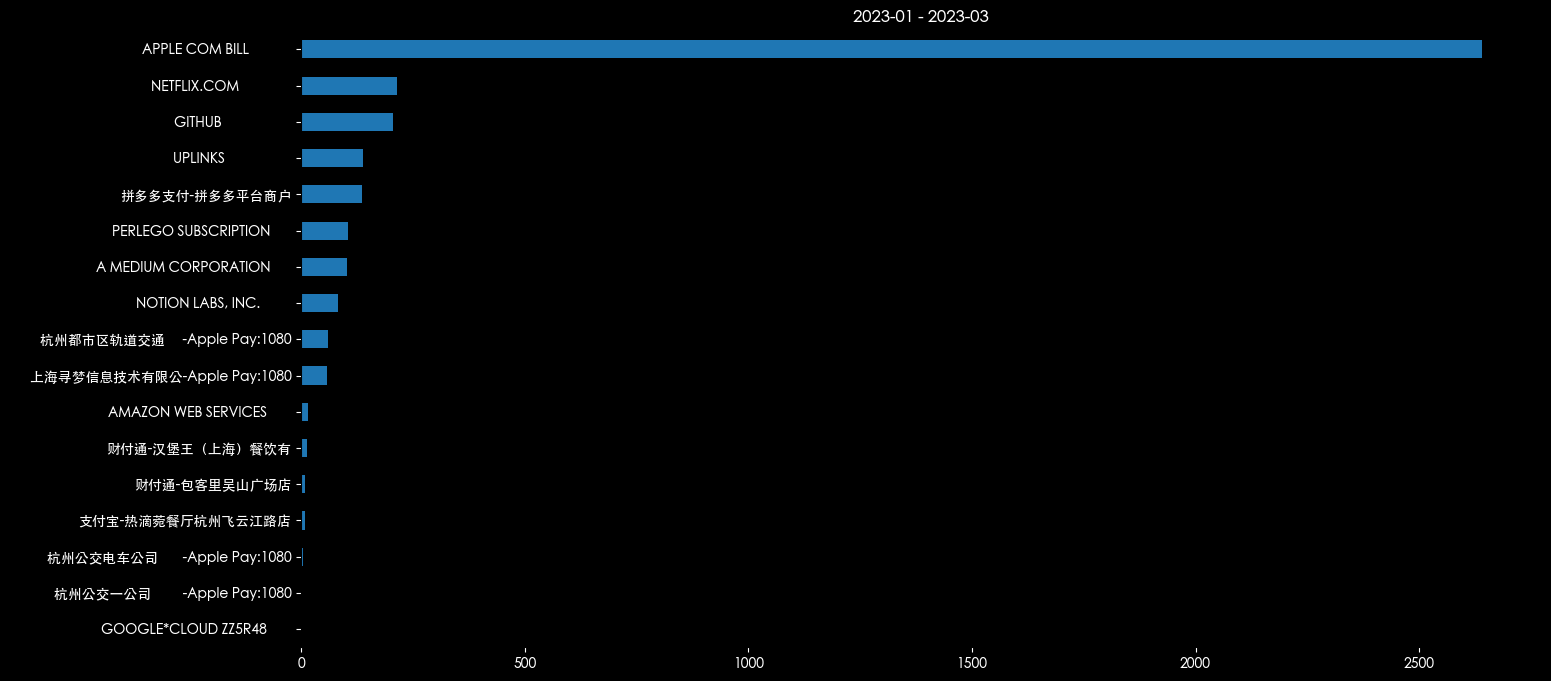

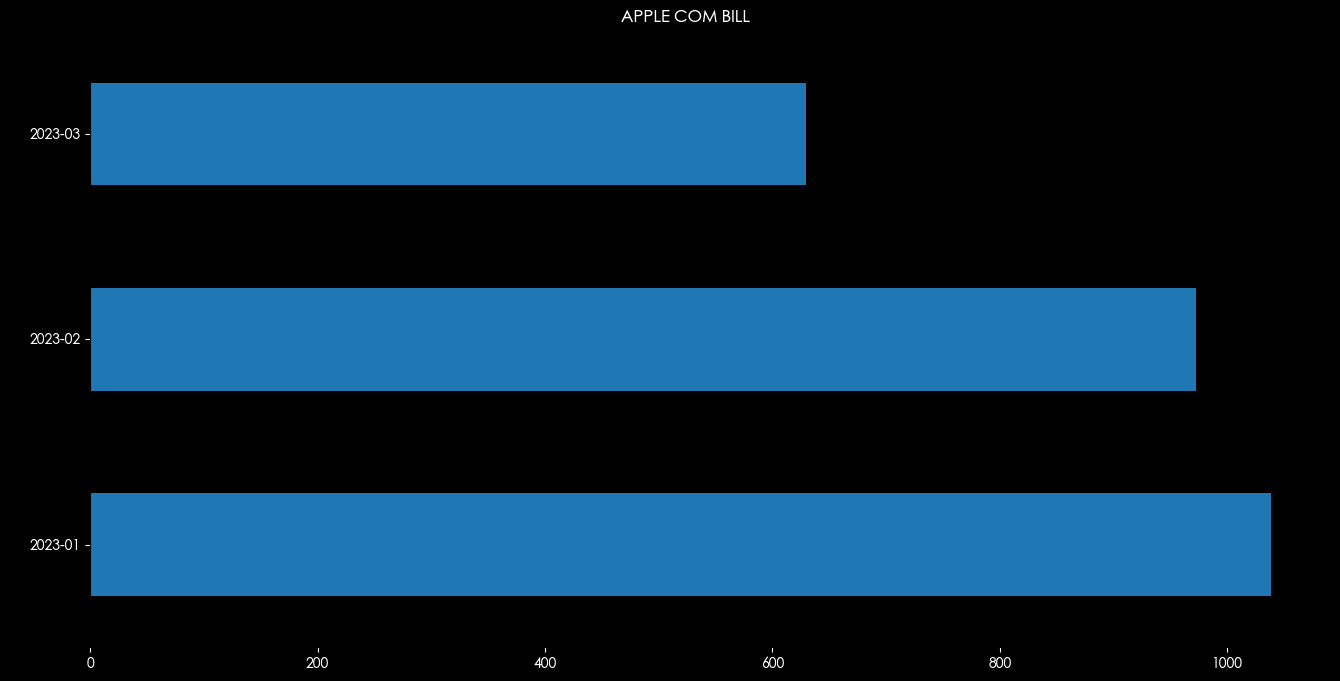

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['font.family']=['Microsoft YaHei', 'Heiti TC']

bills = []
year_months = ['2023-01', '2023-02', '2023-03']
for year_month in year_months:
    csv = pd.read_excel(r'/Users/weiranzhou/Code/pysystemtrade/paper/accounting/{}交易流水.xlsx'.format(year_month))
    debt = float(csv.iloc[1, 1].replace('￥', '').replace(',', ''))
    csv = csv.iloc[9:]
    csv.columns = csv.iloc[0]
    csv = csv.iloc[1:]
    csv = csv.loc[csv['记账日'].notnull()]
    csv = csv.loc[(csv['交易摘要'] != '掌上生活还款') & (csv['交易摘要'] != '掌上生活还款回馈金') & (csv['交易摘要'] != '支付宝还款')]
    csv.loc[:, '人民币金额'] = csv['人民币金额'].astype('float')
    assert (csv['人民币金额'].sum() - debt < 0.1)

    csv = csv[['交易摘要', '人民币金额']]
    csv.loc[:, '交易摘要'] = csv['交易摘要'].transform(lambda x: x.split('汇率')[0])
    assert (csv.groupby('交易摘要').sum().sum().iloc[0] - debt < 0.1)

    bill = csv.groupby('交易摘要')['人民币金额'].sum()
    if year_month == year_months[-1]:
        bill.sort_values().plot.barh(title=year_month, figsize=(16, 8))
        plt.show()
        print(debt)
    bill = bill.reset_index()
    bill = pd.concat([bill, pd.Series([year_month] * len(bill)).rename('year_month')], axis=1)
    bills.append(bill)

bills = pd.concat(bills).reset_index(drop=True)
bills.groupby('交易摘要')['人民币金额'].sum().sort_values().plot.barh(figsize=(16, 8), title= year_months[0] + ' - ' + year_months[-1])
plt.show()

for name,item in bills.groupby('交易摘要'):
    if name == 'APPLE COM BILL            ':
        item.name = name
        item.index = item['year_month']
        item.sort_index()['人民币金额'].plot.barh(title=name, figsize=(16, 8))
        plt.show()